<center>
<img src="https://raw.githubusercontent.com/dvgodoy/PyTorch101_ODSC_Europe2020/master/images/linear_dogs.jpg" height="200">

# Семинар 1: введение в PyTorch
</center>

В этом семинаре мы познакомимся с библиотекой [PyTorch.](https://pytorch.org/docs/stable/index.html) Она будет основной на нашем курсе.

На сегоняшний день PyTorch —  это один из самых поплуярных фреймворков для глубинного обучения. На нём пишут большую часть кода, связанного с нейросетями. Так получилось из-за того, что с ним очень удобно работать. Он очень похож на Numpy, его удодбно использовать с GPU, а ещё он умеет считать градиенты за вас.

Концепция библиотеки pytorch — расширить функционал numpy, добавив туда возможность автоматического расчёта градиентов произвольных функций и их композиций, стараясь максимально сохранить привычную семантику.

Устанавливаем библиотеку

```
pip install torch torchvision
```

Дополнительно с торчом выходят `torchvision` и `torchaudio`. В них есть куча разных методов для работы с изображениями и звуком. Обе эти библиотеки тоже можно поставить виесте с торчом. Первая из них уже сегодня нам понадобится.

In [1]:
import numpy as np
np.__version__

'2.0.2'

In [2]:
import torch
torch.__version__

'2.9.0+cu126'

In [3]:
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import clear_output

# 1. Тензоры и базовые операции над ними

Базовой единицей фреймворка является структура, которая называется `torch.Tensor`. Tensor - это аналог `numpy.array`, многие методы работы с `torch.Tensor` в точности повторяют методы `numpy array`.

Тензор — это тот тип данных, с которыми работают все нейросети в PyTorch. Матрицы весов — это тензоры. Данные, которые мы подаем на вход сети тоже обязательно должны быть приведены к типу `torch.Tensor`. Ну и выход сети, разумеется, тоже будет иметь тип `torch.Tensor`.

Посмотрим на способы создать тензоры.

In [4]:
# можно создать тензор из листа
x = torch.tensor([1, 2, 3, 4])
x

tensor([1, 2, 3, 4])

In [5]:
# или кортежа tuple
b = ((1,2,3), (4,5,6))
t = torch.tensor(b)
t

tensor([[1, 2, 3],
        [4, 5, 6]])

In [6]:
# или из скаляра
torch.tensor(42)

tensor(42)

In [7]:
torch.tensor(3.142)

tensor(3.1420)

In [8]:
torch.tensor(True)

tensor(True)

In [9]:
# или из массива numpy
a = np.array([[1, 2], [3, 4]])
t = torch.tensor(a)
t

tensor([[1, 2],
        [3, 4]])

Строки (str), словари (dict), списки строк — нельзя напрямую конвертировать в тензор

In [10]:
# можно посмотреть тип данных, упакованных в тензор
x.dtype

torch.int64

In [11]:
# можно задать тензор из нулей
torch.zeros(3, 4)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [12]:
# или из единиц, но уже более сложной размерности
torch.ones(3, 4, 2)

tensor([[[1., 1.],
         [1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.],
         [1., 1.]]])

In [13]:
torch.ones(4, 2)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])

In [14]:
torch.ones(2)

tensor([1., 1.])

In [15]:
# можно сгенерировать тензор из стандартного нормального распределения
torch.randn(2,2)

tensor([[-0.8071,  1.7062],
        [-0.0061, -0.4663]])

In [16]:
# тензор с нулями и указанием типа данных
x = torch.zeros(5, 3, dtype=torch.double)
print(x)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float64)


In [17]:
x.double() # можно поменяить тип данных

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float64)

In [18]:
x.int()

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]], dtype=torch.int32)

In [19]:
# float32 базовый тип данных и не подписывается в выдаче
x.float()

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

Все срезы, операции, размерности работают как в numpy. Более того, разработчики PyTorch в последних версиях библиотеки инвестировали массу усилий, чтобы сделать названия функций похожими на numpy. Благодаря этому, если вы знаете одну библиотеку, вы легко можете работать и с другой. Тем не менее, название части функций различается.

In [20]:
x

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float64)

In [21]:
x.shape

torch.Size([5, 3])

In [22]:
# первая строка
x[0]

tensor([0., 0., 0.], dtype=torch.float64)

In [23]:
# все строки первого столбца
x[:,1]

tensor([0., 0., 0., 0., 0.], dtype=torch.float64)

In [24]:
x + 10

tensor([[10., 10., 10.],
        [10., 10., 10.],
        [10., 10., 10.],
        [10., 10., 10.],
        [10., 10., 10.]], dtype=torch.float64)

In [25]:
torch.exp(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

In [26]:
x[x > 0]

tensor([], dtype=torch.float64)

In [27]:
x[x >= 0]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=torch.float64)

In [31]:
tensor = torch.tensor([1, 2, 6, 1, 3, 6])

(tensor > 3).nonzero().flatten()

tensor([2, 5])

In [32]:
# если хотим сохранить структуру
y1 = torch.tensor([[0, -1], [3, -4]])
y2 = torch.where(y1 >= 0, y1, y1 * 10)
y2

tensor([[  0, -10],
        [  3, -40]])

In [33]:
y = torch.rand(5, 3)
y

tensor([[0.3719, 0.1579, 0.3960],
        [0.2134, 0.7062, 0.7151],
        [0.4446, 0.8265, 0.3840],
        [0.7359, 0.9963, 0.2860],
        [0.6757, 0.4537, 0.5454]])

In [34]:
x + y # поэлементное сложение

tensor([[0.3719, 0.1579, 0.3960],
        [0.2134, 0.7062, 0.7151],
        [0.4446, 0.8265, 0.3840],
        [0.7359, 0.9963, 0.2860],
        [0.6757, 0.4537, 0.5454]], dtype=torch.float64)

In [35]:
x * y # поэлементное умножение

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float64)

In [36]:
 # матричное умножение
x @ y.T

RuntimeError: expected m1 and m2 to have the same dtype, but got: double != float

In [37]:
x.dtype, y.dtype # матрицы разного типа и умножение упало

(torch.float64, torch.float32)

In [38]:
x.float() @ y.T

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [39]:
# добавили измерение в начало
x.unsqueeze(0).shape, x[None].shape

(torch.Size([1, 5, 3]), torch.Size([1, 5, 3]))

In [40]:
x.unsqueeze(0)

tensor([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]], dtype=torch.float64)

In [41]:
# убрали измерение в начале
x.unsqueeze(0).squeeze(0).shape

torch.Size([5, 3])

In [42]:
x.unsqueeze(0).squeeze(0)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float64)

Мы также можем переводить тензоры назад в numpy или в питоновские листы:

In [43]:
x.numpy()

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

Если у тензора считаются градиенты, до перевода его нужно "снять" с графа вычислений

In [44]:
t = torch.ones(3, requires_grad=True)
arr = t.detach().numpy()  # требуется detach(), иначе будет ошибка
arr

array([1., 1., 1.], dtype=float32)

In [45]:
x.tolist()

[[0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0]]

Одномерные тензоры можно распаковать в числа

In [46]:
x = torch.tensor([3])
x # тензор размера 1x1

tensor([3])

In [47]:
x.item() # число

3

### Задание 1:

- При помощи numpy посчитайте сумму квадратов чисел от 1 до 10000
- Сделайте то же самое с помощью pytorch

In [48]:
# ваш код  ¯\_(⊙︿⊙)_/¯

### Задание 2:

Реализуйте на PyTorch сигмоиду

$$ \sigma(x) = \frac{1}{1 + e^{-x}} $$

In [49]:
# ващ код  ¯\_(⊙︿⊙)_/¯

### Задание 3:

Реализуйте на PyTorch среднюю квадратичную ошибку.

$$
MSE(\hat y, y) = \frac{1}{n} \cdot \sum_{i=1}^n (\hat y - y)^2
$$

In [50]:
# ващ код  ¯\_(⊙︿⊙)_/¯

# 2. Работа с GPU

Первое ключевое отличие PyTorch от numpy - лёгкая работа с GPU.

Мы работаем в Google Colab, поэтому запустим её на видео-карте ещё раз явно. Это можно сделать кнопкой `Среда выполнения/сменить среду выполнения`. В списке выберите любую доступную видеокарту.

In [51]:
!nvidia-smi

Sun Nov 23 22:29:15 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   53C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [52]:
x = torch.randn(3, 5)
x.dtype, x.device # тензор лежит на CPU

(torch.float32, device(type='cpu'))

In [53]:
# проверяем доступность GPU
torch.cuda.is_available()

True

In [54]:
torch.cuda.device_count() # число доступных GPU

1

In [55]:
# чтобы отправить вычисления на девайс,
# надо создать переменную с ним
# число - номер видокарты в компе
torch.device('cuda:0')

device(type='cuda', index=0)

In [56]:
# универсальная строка которую мы будем втыкать во все наши скрипты
# выбирает то что есть
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [57]:
x = torch.randn(4, 4)

x.to(device) # отправить тензор на GPU

tensor([[ 0.3227,  0.2855, -1.4040,  1.2682],
        [-0.3477,  0.3657, -0.2890,  0.7331],
        [-1.5330, -0.3859,  0.1203,  2.2129],
        [ 0.8501, -0.5663, -1.4673, -0.9711]], device='cuda:0')

In [58]:
x.cuda() # ещё можно отправить так

tensor([[ 0.3227,  0.2855, -1.4040,  1.2682],
        [-0.3477,  0.3657, -0.2890,  0.7331],
        [-1.5330, -0.3859,  0.1203,  2.2129],
        [ 0.8501, -0.5663, -1.4673, -0.9711]], device='cuda:0')

In [59]:
x.cpu() # вернуть назад

tensor([[ 0.3227,  0.2855, -1.4040,  1.2682],
        [-0.3477,  0.3657, -0.2890,  0.7331],
        [-1.5330, -0.3859,  0.1203,  2.2129],
        [ 0.8501, -0.5663, -1.4673, -0.9711]])

Обратите внимание, что при изменении device (c GPU на CPU и обратно происходит копирование). Операции между тензорами на разных устройствах не возможны:

ps это супер-важное замечание, ошибка такого типа будет часто всплывать при обучении моделей

In [60]:
x.cuda() + x

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

Сравним скорость работы типичного слоя нейронной сети — матричное умножение + нелинейность на CPU и GPU



In [61]:
def layer(A, B):
    C = A @ B
    C = C ** 2
    return C

In [62]:
A = torch.randn(1000, 1000)
B = torch.randn(1000, 1000)

- µs (микросекунда) = 10⁻⁶ секунды
- ms (миллисекунда) = 10⁻³ секунды

In [63]:
%timeit _ = layer(A, B)

16.6 ms ± 2.69 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [64]:
A_device, B_device = A.to(device), B.to(device)
%timeit _ = layer(A_device, B_device)

581 µs ± 12.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Видим, что вычисления на GPU значительно быстрее вычислений на CPU, но мы не учли одну вещь — время копирования данных. Давайте сделаем более честный замер

In [65]:
%timeit _ = layer(A.to(device), B.to(device))

1.86 ms ± 34.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Всё ещё выигрываем во времени, но копирование забрало часть выигрыша.

На GPU делаются сложные вычисления. Все простые операции вроде подготовки данных и логгирования метрик должны происходить на CPU.

Данные обычно предобрабатывают на CPU, затем формируют батчи для обучения и передают на GPU. Сама нейросеть учится на GPU и там хранит свои градиенты и веса.

# 3. Производные да градиенты

Вторая ключевая особенность PyTorch — умение считать градиенты. При создании тензора можно указать, нужно ли считать по нему градиент с помощью параметра `requires_grad`.

Когда `requires_grad=True` мы сообщаем фреймворку, что хотим считать градиенты по этому тензору. Иными словами, у любого тензора, у которого указан данный параметр, будет доступ к цепочке операций и преобразований совершенными с ними. Если эти функции дифференцируемые, то у тензора появляется параметр `.grad`, в котором хранится значение градиента.

PyTorch проходит по всем операциям, которые фигурируют в графе вычислений, и применяет к ним производную сложной функции (chain rule):

$$ {\partial f(g(x)) \over \partial x} = {\partial f(g(x)) \over \partial g(x)}\cdot {\partial g(x) \over \partial x} $$

Давайте попробуем!

In [66]:
x = torch.randn(3, 3, requires_grad=True)

In [67]:
# пока градиента нет
print(x.grad, '<- gradient')

None <- gradient


In [68]:
y = torch.sum(x * x)
y.backward()

# градиент подъехал
print(x.grad, '<- gradient')

tensor([[ 3.4029, -1.4354,  0.4845],
        [-1.2220,  3.3564,  0.6732],
        [ 2.3568, -3.5594,  0.3156]]) <- gradient


Если не предпринимать никаких дополнительных действий, то множественный вызов `.backward()` будет не перезаписывать градиенты тензоров, а складывать их с уже существующим значением (сам граф вычислений каждый раз разрушается).

In [69]:
z = torch.sum(2 * x)
z.backward()

# Заметьте, что ко всем значениям прибавилось 2
print(x.grad, '<- gradient')

tensor([[ 5.4029,  0.5646,  2.4845],
        [ 0.7780,  5.3564,  2.6732],
        [ 4.3568, -1.5594,  2.3156]]) <- gradient


In [71]:
x = torch.randn(3, 3, requires_grad=True)

z = torch.sum(x + 5)
z.backward()

# Что будет на выходе?
# print(x.grad, '<- gradient')

Обычно мы обучаем модель не по одному объекту, а на большой выборке. Вся выборка в память не влезает. Мы прогоняем через нейросеть данные батчами. PyTorch позволяет накапливать градиенты по батчам не помещая в память все данные.

Чтобы считать градиент с нуля, достаточно его удалить или обнулить.

In [72]:
x.grad.zero_()

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

### Задание 4:

Реализуйте расчёт градиента для функции

$$
f(w) = \prod_{i,j} \ln(\ln(w_{ij} + 7)
$$

в точке `w = [[5,10], [1,2]]`

In [73]:
# ващ код  ¯\_(⊙︿⊙)_/¯

В numpy существует интуитивно понятная функция `.copy()`, но в pytorch функции с таким названием нет! Это связано с тем, что тензоры в pytorch привязаны к графу вычислений, который надо также учитывать при копировании.

`.clone()` копирует тензор и сохраняет его привязку к текущему дереву вычислений.

### Задание 5:

Что будет в переменной `x` в результате выполнения следующего кода? Почему?

In [74]:
x = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
y = x
y[2] = torch.ones(3)

print(y)
print('')
print(x)

tensor([[1, 2, 3],
        [4, 5, 6],
        [1, 1, 1]])

tensor([[1, 2, 3],
        [4, 5, 6],
        [1, 1, 1]])


Как это можно исправить?

In [75]:
# ващ код  ¯\_(⊙︿⊙)_/¯

Очень часто при копировании градиентов недостаточно сделать только `.clone`, так как мы не хотим сохранять связь с графом вычислений. Например, если мы применим `.clone` к выходу нейросети, то добавим новое ребро в граф вычислений, что повличет накладные расходы.

Чтобы отвязать тензор от текущего графа вычислений надо использовать `.detach()`, он копирует лишь значения элементов тензора, отвязывая его от текущего графа вычислений.


In [76]:
x = torch.rand(3, requires_grad=True)
x.requires_grad

True

In [77]:
y = x.clone()
y.requires_grad

True

In [78]:
z = x.detach()
z.requires_grad

False

### Забавный пример: как положить продакшн?

Когда мы будем учить нейросети, мы будем делать много итераций обучения. В конце каждой мы захотим сохранять значение функции потерь. Если вычислить её для нового батча данных и забыть отвязать от графа вычислений, мы будем таскать за собой весь граф. Давайте искусттвенно забудем это сделать и уроним GPU по памяти.

In [ ]:
torch.cuda.empty_cache() # на всякий случай почистили кэш

w = torch.randn(10000, requires_grad=True).cuda() # наши веса модели

losses = [ ]
for i in range(50):
    x = torch.randn((10000, 10000)).cuda()  # пришли свежие данные
    loss = torch.linalg.norm(x @ w)         # как бы посчитали метрику качества
    losses.append(loss)                     # запомнили её

    print(f"Сейчас занято {torch.cuda.max_memory_allocated() // 1024 // 1024} MB")

Сейчас занято 398 MB
Сейчас занято 780 MB
Сейчас занято 1162 MB
Сейчас занято 1544 MB
Сейчас занято 1926 MB
Сейчас занято 2308 MB
Сейчас занято 2690 MB
Сейчас занято 3072 MB
Сейчас занято 3454 MB
Сейчас занято 3836 MB
Сейчас занято 4218 MB
Сейчас занято 4600 MB
Сейчас занято 4982 MB
Сейчас занято 5364 MB
Сейчас занято 5746 MB
Сейчас занято 6128 MB
Сейчас занято 6510 MB
Сейчас занято 6892 MB
Сейчас занято 7274 MB
Сейчас занято 7657 MB
Сейчас занято 8039 MB
Сейчас занято 8421 MB
Сейчас занято 8803 MB
Сейчас занято 9185 MB
Сейчас занято 9567 MB
Сейчас занято 9949 MB
Сейчас занято 10331 MB
Сейчас занято 10713 MB
Сейчас занято 11095 MB
Сейчас занято 11477 MB
Сейчас занято 11859 MB
Сейчас занято 12241 MB
Сейчас занято 12623 MB
Сейчас занято 13005 MB
Сейчас занято 13387 MB
Сейчас занято 13769 MB
Сейчас занято 14151 MB
Сейчас занято 14533 MB
Сейчас занято 14915 MB


OutOfMemoryError: CUDA out of memory. Tried to allocate 382.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 46.12 MiB is free. Process 2698 has 14.69 GiB memory in use. Of the allocated memory 14.57 GiB is allocated by PyTorch, and 4.25 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

Отвязать от графа вычислений скаляр можно методом `.item()`. Добавляем его к коду и проблема уходит.

In [79]:
torch.cuda.empty_cache() # на всякий случай почистили кэш

w = torch.randn(10000, requires_grad=True).cuda() # наши веса модели

losses = [ ]
for i in range(50):
    x = torch.randn((10000, 10000)).cuda()  # пришли свежие данные
    loss = torch.linalg.norm(x @ w)         # как бы посчитали метрику качества
    losses.append(loss.item())              # запомнили её

    print(f"Сейчас занято {torch.cuda.max_memory_allocated() // 1024 // 1024} MB")

Сейчас занято 398 MB
Сейчас занято 780 MB
Сейчас занято 780 MB
Сейчас занято 780 MB
Сейчас занято 780 MB
Сейчас занято 780 MB
Сейчас занято 780 MB
Сейчас занято 780 MB
Сейчас занято 780 MB
Сейчас занято 780 MB
Сейчас занято 780 MB
Сейчас занято 780 MB
Сейчас занято 780 MB
Сейчас занято 780 MB
Сейчас занято 780 MB
Сейчас занято 780 MB
Сейчас занято 780 MB
Сейчас занято 780 MB
Сейчас занято 780 MB
Сейчас занято 780 MB
Сейчас занято 780 MB
Сейчас занято 780 MB
Сейчас занято 780 MB
Сейчас занято 780 MB
Сейчас занято 780 MB
Сейчас занято 780 MB
Сейчас занято 780 MB
Сейчас занято 780 MB
Сейчас занято 780 MB
Сейчас занято 780 MB
Сейчас занято 780 MB
Сейчас занято 780 MB
Сейчас занято 780 MB
Сейчас занято 780 MB
Сейчас занято 780 MB
Сейчас занято 780 MB
Сейчас занято 780 MB
Сейчас занято 780 MB
Сейчас занято 780 MB
Сейчас занято 780 MB
Сейчас занято 780 MB
Сейчас занято 780 MB
Сейчас занято 780 MB
Сейчас занято 780 MB
Сейчас занято 780 MB
Сейчас занято 780 MB
Сейчас занято 780 MB
Сейчас занято

# 4. Оптимизация

Итак, PyTorch умеет искать производные, осталось научиться применять его для оптимизации.

Давайте обучим линейную регрессию.

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2990065820.py:2: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


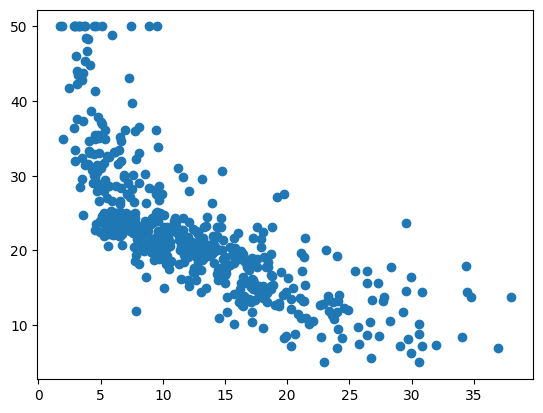

In [80]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

plt.scatter(data[:, -1], target);

Зададим тензоры для весов. Обучим модель на CPU, чтобы не загромождать код перебрасыванием данных туда-сюда.



In [81]:
w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

In [82]:
w, b

(tensor([1.0898], requires_grad=True), tensor([-1.1074], requires_grad=True))

In [83]:
x = torch.tensor(data[:, -1] / data[:, -1].max(), dtype=torch.float32)
y = torch.tensor(target, dtype=torch.float32)

In [84]:
# Наша модель
def linear_regression(x):
    return w * x + b

# Ошибка для модели
def mean_square(y_pred, y_true):
    return torch.mean((y_pred - y_true) ** 2)

In [85]:
pred = linear_regression(x)
pred.shape

torch.Size([506])

In [86]:
loss = mean_square(pred, y)
loss

tensor(629.0588, grad_fn=<MeanBackward0>)

In [87]:
# считаем градиенты
loss.backward()

In [88]:
print("dL/dw = \n", w.grad)
print("dL/db = \n", b.grad)

dL/dw = 
 tensor([-12.8898])
dL/db = 
 tensor([-46.5541])


Обучим модель с помощью градентного спуска.

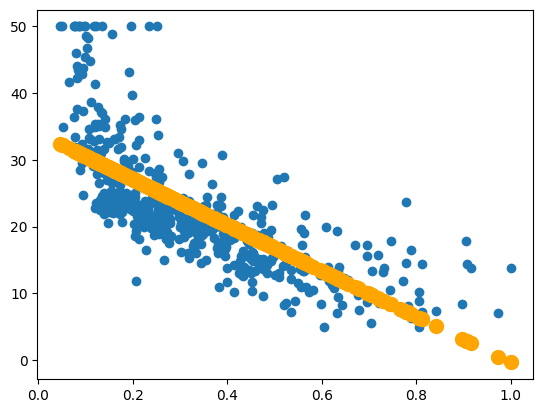

loss =  38.589745


In [89]:
from IPython.display import clear_output

epochs = 1000 # число эпох

w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

for i in range(epochs):

    y_pred = linear_regression(x)
    loss = mean_square(y_pred, y)

    loss.backward() # считаем градиенты

    with torch.no_grad():
      # делаем шаг градиентного спуска с lr = .05
      w -= 0.05 * w.grad
      b -= 0.05 * b.grad

      # обнуляем градиенты, чтобы на следующем шаге посчитать их с нуля,
      # а не сложить с предыдущими
      w.grad.zero_()
      b.grad.zero_()

    # рисуем картинки
    if (i+1) % 5 == 0:
        clear_output(True)
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.scatter(x.data.numpy(), y_pred.data.numpy(),
                    color='orange', linewidth=5)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.5:
            print("Done!")
            break


В этом примере мы написали градиентный спуск руками. На парктике нам не придется это делать. К счастью, в PyTorch есть отдельный модуль, который отвечает за оптимизаторы. На него мы посмотрим ниже при обучении своей первой нейросети.

# 5. Менеджеры контекста

Поведением градиента сразу группы тензоров можно управлять с помощью специальных функций, которые вызываются через стандартную семантику питона `with foo():`, где `foo` — одна из трёх функций ниже:

- **Default Mode.** Стандартный режим работы pytorch, в котором управление градиентами происходит через `requires_grad`. Явно его нужно вызывать только внутри других контекстных менеджеров, чтобы временно снова активировать расчёт градиентов (что случается крайне редко) вызовом `torch.enable_grad()`.

- **No grad mode.** Данный режим используется когда блока кода нет необходимости вычислять градиенты, что занимает как вычислительные ресурсы, так и дополнительную память. Реализуется вызовом `torch.no_grad()`. Типичная ошибка -- забыть отключить вычисление градиентов при инференсе и забить всю оперативку ими.

- **Inference mode.**  Аналогично No grad mode отключает расчёт градиентов, но кроме того проводит дополнительные оптимизации, что делает вычисления внутри блока кода ещё быстрее. Однако, тензоры, созданные в таком блоке будет невозможно использовать совместно с тензорами, для которых расчёт градиента необходим. Реализуется вызовом `torch.inference_mode()`.

In [90]:
x = torch.rand(3, requires_grad=True)

with torch.no_grad():
    y = x + x

y.requires_grad

False

In [91]:
@torch.no_grad()
def foo(x):
    return x + 2

y = foo(x)
y.requires_grad

False

# 6. Моя первая нейросеть

Для того, чтобы разобраться как обучать нейросетки, нужно освоить три вещи:

1. Как обрабатывать поток данных и пихать его в сетку
2. Как сделать сетку
3. Как написать цикл обучения

## 6.1 Как формировать батчи и пихать их в сетку

С данными помогают работать две абстракции: `Dataset` и `DataLoader`.

`Dataset` умеет выдавать по индексу некоторый элемент и помогает итерироваться по данным. Чтобы работать с данными и применять к ним преобразования, например, аугментации, о которых вы узнаете позже — нужно создать свой класс унаследованный от `torch.utils.data.Dataset`.

У такого класса должно быть два метода:

* `__len__` — возвращает информацию о том, сколько объектов у нас в датасете
* `__getitem__` — возвращает семпл и таргет к нему

Теперь давайте напишем такой сами, в качестве датасета сгенерируем рандомные данные. В следующих семинарах мы обязательно попишем более сложные датасеты.

In [92]:
class RandomDataset(torch.utils.data.Dataset):
    """Our random dataset"""

    def __init__(self, x, y):
        self.x=x
        self.y=y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return {'sample': torch.tensor(x[idx, :], dtype=torch.float), 'target': y[idx]}

In [93]:
x = np.random.rand(1000, 5)
y = np.random.rand(1000)

In [94]:
our_dataset = RandomDataset(x, y)

In [95]:
our_dataset.__getitem__(1)

{'sample': tensor([0.6911, 0.4523, 0.7966, 0.2439, 0.6361]),
 'target': np.float64(0.5510923696831196)}

`Dataset` умеет говорить сколько в выборке объектов и брать из неё очередной. Этого мало. Данные хочется как-то видоизменять. Для этого есть такая сущность как `DataLoader`.

Он принимает на вход класс унаследованный от `torch.utils.data.Dataset` и преобразовывает его.

In [96]:
dataloader = torch.utils.data.DataLoader(our_dataset, batch_size=4, shuffle=True)

Здесь:
- `batch_size` — размер батча, на которые даталоадер будет делить данные перед каждой эпохой;
- `shuffle` — если `True`, то перед каждой эпохой и делением на батчи данные будут перемешаны. Shuffle обычно ставится `True` для обучающих данных, и `False` для тестовых.

Итерироваться по данным можно циклом.



In [97]:
for batch in dataloader:
    batch_x = batch['sample']
    batch_y = batch['target']
    break

print('Sample:', batch_x)
print('Target:', batch_y)

Sample: tensor([[0.6843, 0.2272, 0.5907, 0.2731, 0.7727],
        [0.4121, 0.5079, 0.1864, 0.5858, 0.4411],
        [0.6601, 0.2738, 0.2517, 0.5920, 0.0607],
        [0.6260, 0.9323, 0.2389, 0.8684, 0.6803]])
Target: tensor([0.7384, 0.3648, 0.0189, 0.8483], dtype=torch.float64)


Если бы мы написали метод в классе даталоадера чуть иначе:

```
    def __getitem__(self, idx):
        # Возвращаемый результат — (x, y), а не словарь!
        sample = torch.tensor(self.x[idx, :], dtype=torch.float)
        target = torch.tensor(self.y[idx], dtype=torch.float)
        return sample, target
```

мы бы возвращали tuple а не словарь и смогли бы итерироваться по объектам лоадера проще

```
for batch_x, batch_y in dataloader:
```

## 6.2 Нейронная сеть

Есть несколько способов задать нейросеть.

**Способ 1:** задать нейросеть в виде класса, который наследуется от абстрактного класса `torch.nn.Module`. В этот класс завёрнуто куча кода, который делает работу с параметрами нейросети на порядок удобнее.

Нам для задания нейросети достаточно определить у класса методы `__init__ `и `forward`.

В методе `__init__ ` обычно прописываются слои и артибуты сети, а в `forward` — то, как нейросеть будет обрабатывать данные, поданные ей на вход.

In [108]:
from torch import nn
import torch.nn.functional as F

class NeuralNet(nn.Module):
    def __init__(self):

      '''
        Конструктор блока. Здесь обычно создают обучаемые параметры и сохраняют переменные,
            определяющие глобальное состояние слоя, а так же гиперпараметры
        Блок, может содержать в себе подблоки, которые также были отнаследованы от базового класса torch.nn.Module
      '''
      # Необходимо вызвать конструктор базового класса для корректной работы блока
      super().__init__()
      self.model = nn.Sequential(
          nn.Linear(5, 3),
          nn.ReLU(),
          nn.Linear(3, 1)
        )

    def forward(self, x):
        '''
        Функция, реализующая прямой проход через слой. В процессе вычислений создаётся граф вычислений
            сквозь который выполняется автоматическое дифференцирование.
        '''
        return self.model(x)

Модуль `nn` содержит в себе реализацию большинства слоев, а модуль `nn.functional`—  функций активаций.

In [109]:
model = NeuralNet()  # завели себе нейросеть
model(batch_x)   # получили предсказания модели

tensor([[-0.4603],
        [-0.5561],
        [-0.5561],
        [-0.5472]], grad_fn=<AddmmBackward0>)

__Способ 2:__ можно собрать модель с помощью класса `Sequential`. В его рамках сбор модели будет выглядить как строительство башни из конструктора LEGO. Модель описывается последовательно. Мы как бы создаём коробочку `model` и постепенно добавляем туда детальки нашей сетки.

In [110]:
model = nn.Sequential()                 # создаем пустую модель, в которую будем добавлять слои
model.add_module('l1', nn.Linear(5, 3)) # добавили слой с 5-ю нейронами на вход и 3-мя на выход
model.add_module('l2', nn.ReLU())       # добавили функцию активации
model.add_module('l3', nn.Linear(3, 1)) # добавили слой с 3-мя нейронами на вход и 5-ю на выход

In [111]:
model(batch_x) # получили предсказания модели

tensor([[0.4626],
        [0.4053],
        [0.4348],
        [0.3982]], grad_fn=<AddmmBackward0>)

__Способ 3:__ описать модель функционально, в явном виде прописав какие аргументы идут на вход какому слою.

In [112]:
class NeuralNet(nn.Module):
    def __init__(self):
        '''
        Конструктор блока. Здесь обычно создают обучаемые параметры и сохраняют переменные,
            определяющие глобальное состояние слоя, а так же гиперпараметры
        Блок, может содержать в себе подблоки, которые также были отнаследованы от базового класса torch.nn.Module
        '''
        # Необходимо вызвать конструктор базового класса для корректной работы блока
        super().__init__()

        self.linear1 = nn.Linear(5, 3)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(3, 1)

    def forward(self, x):
        '''
        Функция, реализующая прямой проход через слой. В процессе вычислений создаётся граф вычислений
            сквозь который выполняется автоматическое дифференцирование.
        '''
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x


h = nn.Linear(5, 3)(batch_x)
h = nn.ReLU()(h)
out = nn.Linear(3, 1)(h)
out

tensor([[-0.2743],
        [-0.2346],
        [-0.2109],
        [-0.2276]], grad_fn=<AddmmBackward0>)

Обычно модель объявляют в виде класса, а второй и третий способ используют, чтобы в в более явном виде задать разные вычислительные блоки.

## 6.3 Цикл для обучения модели

Осталось научиться писать циклы для обучения. Давайте подгрузим настоящие данные, соберём модель и обучим её.

In [113]:
from torchvision.datasets import MNIST
from torch.utils.data import Dataset, DataLoader

# внутри модуля transforms есть много полезных преобразований
# пока что нам из него понадобится только T.ToTensor()
# для конвертации картинки в тензор
import torchvision.transforms as T

Не будем выпендриваться и обучим нашу первую нейросеть на [классическом датасете из рукопистных цифр MNIST.](http://yann.lecun.com/exdb/mnist/)

In [114]:
# подгружаем датасет из библиотеки
train_set = MNIST('.MNIST', transform=T.ToTensor(), train=True, download=True)
test_set = MNIST('.MNIST', transform=T.ToTensor(), train=False, download=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 18.4MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 449kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.17MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.36MB/s]


Давайте нарисуем несколько изображений.

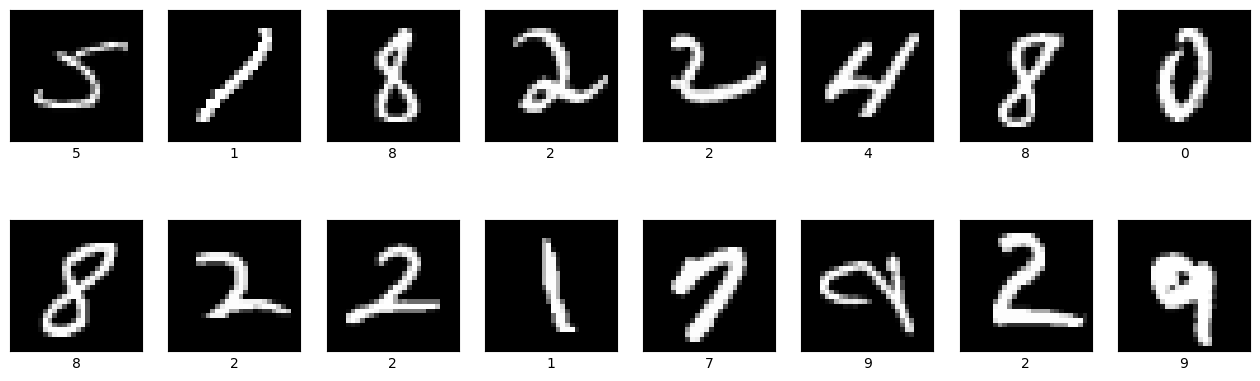

In [116]:
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols, 2.5 * rows))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(train_set))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(train_set[random_index][0].squeeze(0).numpy().reshape([28, 28]), cmap = 'gray')
        ax.set_xlabel(train_set[random_index][1])
plt.show()

Каждая картинка это матрица из чисел. Если число большое - пиксель яркий. Если маленькое - тёмный.

In [117]:
train_set[5][0].shape

torch.Size([1, 28, 28])

Будем прогнозировать тип картинки по её пикселям. Подготовим данные с помощью `DataLoader`. Пока что попробуем настроить его максимально просто. В будущем мы увидим с вами другую магию, на которую способна эта абстракция.

### Задание 7:

Напишите `DataLoader` для тренировочной и тестовой выборок. Попробуйте проитерироваться по нескольким его первым объектам с помощью цикла.

В обучающей выборке данные должны перемешиваться каждую эпоху. Размер батча поставьте равным 64. В тестовой выборке данные перемешивать не надо.

In [124]:
# берем датасет, перемешиваем его и формируем батчи

### Задание 8:

Напишите  двухслойную полносвязную нейросеть. Выходной слой должен состоять из $10$ нейронов.

In [125]:
class NeuralNet(nn.Module):
    def __init__(self, in_features, num_classes, hidden_size):
        super().__init__()
        self.model = nn.Sequential(

            # ващ код  ¯\_(⊙︿⊙)_/¯

            nn.Linear(in_features=in_features, out_features=hidden_size),
            nn.ReLU(),
            nn.Linear(in_features=hidden_size, out_features=hidden_size, bias=False),
            nn.LeakyReLU(0.1),
            nn.Linear(in_features=hidden_size, out_features=num_classes),

        )

    def forward(self, x):
        return self.model(x)

In [126]:
model = NeuralNet(28**2, 10, 20)

Веса моделей хранятся в виде матриц и выглядят так:

In [127]:
# [x for x in model.named_parameters()]

Объявляем модель и оптимизатор.

In [128]:
IMG_SIZE = 28
NUM_CLASSES = 10
HIDDEN_SIZE = 64
NUM_EPOCHS = 10

# объявим нейросеть и пошлём её на GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = NeuralNet(in_features=IMG_SIZE ** 2, num_classes=NUM_CLASSES, hidden_size=HIDDEN_SIZE).to(device)

# чтобы не писать самим SGD, подгрузим готовый оптимизатор
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# функция потерь
criterion = nn.CrossEntropyLoss() # работает с логитом!


Осталось всё это дело обучить. Для этого нам придётся написать цикл

In [129]:
from tqdm.notebook import tqdm

# NUM_EPOCHS раз подряд пройдемся по всем батчам из трейна
for epoch in range(NUM_EPOCHS):

    # переключили модель в режим трэйна (важно для батчнорма и дропаута)
    # как минимум эти два слоя при обучении и прогнозировании работают по-разному
    model.train()

    # берем батч из трейн лоадера
    for images, labels in tqdm(train_loader):

        # отправляем тензоры на девайс к сетке
        images = images.to(device)
        labels = labels.to(device)

        ### Пишем самые важные 5 строк
        # зануляем старые градиенты, иначе они сложатся
        optimizer.zero_grad()

        # вызываем модель
        logits = model(torch.flatten(images, start_dim=1))
        # (batch_size, x, num_classes) - размерность

        # считаем функцию потерь
        loss = criterion(logits, labels)

        # считаем градиенты обратным проходом
        loss.backward()

        # обновляем параметры сети (шаг спуска)
        optimizer.step()

    if epoch % 2 == 0:
        mean_val_loss = [] # сюда будем складывать средний лосс по батчам
        val_accuracy = []

        # переключили модель в режим инференса (важно для дропаута и батчнорма)
        model.eval()

        # берем батч из вал лоадера для валидации
        for images, labels in tqdm(test_loader, desc='Validating'):
            images = images.to(device)
            labels = labels.to(device)

            # мы считаем качество, поэтому мы запрещаем фреймворку считать
            # градиенты по параметрам, это лишнее, они нам не нужны
            with torch.no_grad():
                # делаем предсказания
                logits = model(torch.flatten(images, start_dim=1))

                # считаем ошибку на валидации
                loss = criterion(logits, labels)

                mean_val_loss.append(loss.cpu().item()) # добавляем в массив
                val_accuracy.extend((torch.argmax(logits, dim=-1) == labels).cpu().numpy().tolist())

        # выводим статистику
        print('Epoch: {epoch}, loss: {loss}, accuracy: {accuracy}'.format(
                epoch=epoch, loss=np.mean(mean_val_loss), accuracy=np.mean(val_accuracy)
        ))


  0%|          | 0/938 [00:00<?, ?it/s]

Validating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 0, loss: 0.2586684527682366, accuracy: 0.922


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

Validating:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 2, loss: 0.12802633430636756, accuracy: 0.9601


  0%|          | 0/938 [00:00<?, ?it/s]

KeyboardInterrupt: 

Кажется, что всё работает. Но есть проблемы:

- Мы не нарисовали ни одного графика. Метрики хорошо бы куда-то залоггировать.
- Цикл громоздкий, хорошо бы разбить его на отдельные функции для обучения и валидации. Мы будем его постоянно переписывать и дополнять. Рано или поздно код станет нечитаемым.
- Проблема воспроизводимости. Обучение сильно меняется от запуска к запуску. Возможно, вы один раз получите крутой результат, а потом не сможете его никогда воспроизвести. Это плохо. Чтобы такого не было, надо зафиксировать `seed`.

## 7. Итоговый пайплайн

Для начала постараемся сделать обучение независимым от очередности запуска, воспользуемся советами из официальной статьи [Reproducibilty PyTorch.](https://docs.pytorch.org/docs/stable/notes/randomness.html) Нам необходимо:

- Зафиксировать сид cpu
- Зафиксировать сид gpu
- Зафиксировать сид numpy
- Зафиксировать сид стандартного random

In [130]:
def set_global_seed(seed: int) -> None:
    """Set global seed for reproducibility.
    :param int seed: Seed to be set
    """
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)

    # если хочется воспроизводимость на 1000%, надо настроить эту штуку
    # torch.use_deterministic_algorithms(True)

    # также можно зафиксировать seed для Dataloader
    g = torch.Generator()
    g.manual_seed(seed)
    return g

# Сид для каждого worker в Dataloader
def seed_worker(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)

Эти функции с сидами можно просто копировать в начало своих тетрадок и добавлять в DataLoader.

Теперь напишем функции для обучения.

In [131]:
sns.set_style('whitegrid')
plt.rcParams.update({'font.size': 15})

def plot_losses(train_losses, test_losses, train_accuracies, test_accuracies):
    clear_output()
    fig, axs = plt.subplots(1, 2, figsize=(13, 4))
    axs[0].plot(range(1, len(train_losses) + 1), train_losses, label='train')
    axs[0].plot(range(1, len(test_losses) + 1), test_losses, label='test')
    axs[0].set_ylabel('loss')

    axs[1].plot(range(1, len(train_accuracies) + 1), train_accuracies, label='train')
    axs[1].plot(range(1, len(test_accuracies) + 1), test_accuracies, label='test')
    axs[1].set_ylabel('accuracy')

    for ax in axs:
        ax.set_xlabel('epoch')
        ax.legend()

    plt.show()

In [132]:
def training_epoch(model, optimizer, criterion, train_loader, tqdm_desc):
    """Одна эпоха обучения"""
    train_loss, train_accuracy = 0.0, 0.0
    model.train()
    for images, labels in tqdm(train_loader, desc=tqdm_desc):
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        logits = model(torch.flatten(images, start_dim=1))
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * images.shape[0]
        train_accuracy += (logits.argmax(dim=1) == labels).sum().item()

    train_loss /= len(train_loader.dataset)
    train_accuracy /= len(train_loader.dataset)
    return train_loss, train_accuracy


@torch.no_grad()
def validation_epoch(model, criterion, test_loader, tqdm_desc):
    """Прогнозы на валидации"""

    test_loss, test_accuracy = 0.0, 0.0
    model.eval()
    for images, labels in tqdm(test_loader, desc=tqdm_desc):
        images = images.to(device)
        labels = labels.to(device)

        logits = model(torch.flatten(images, start_dim=1))
        loss = criterion(logits, labels)

        test_loss += loss.item() * images.shape[0]
        test_accuracy += (logits.argmax(dim=1) == labels).sum().item()

    test_loss /= len(test_loader.dataset)
    test_accuracy /= len(test_loader.dataset)
    return test_loss, test_accuracy


def train(model, optimizer, criterion, train_loader, test_loader, num_epochs, scheduler=None):
    """Обучение модели"""

    train_losses, train_accuracies = [], []
    val_losses, val_accuracies = [], []

    for epoch in range(1, num_epochs + 1):
        train_loss, train_accuracy = training_epoch(
            model, optimizer, criterion, train_loader,
            tqdm_desc=f'Training {epoch}/{num_epochs}'
        )
        val_loss, val_accuracy = validation_epoch(
            model, criterion, test_loader,
            tqdm_desc=f'Validating {epoch}/{num_epochs}'
        )

        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        # функция для смены lr по расписанию
        if scheduler is not None:
            scheduler.step()

        plot_losses(train_losses, val_losses, train_accuracies, val_accuracies)

In [133]:
g = set_global_seed(42)

train_set = MNIST('.MNIST', transform=T.ToTensor(), train=True, download=True)
val_set = MNIST('.MNIST', transform=T.ToTensor(), train=False, download=True)

train_loader = torch.utils.data.DataLoader(
    train_set,
    batch_size     = 256,
    shuffle        = True,
    num_workers    = 0,
    worker_init_fn = seed_worker,
    generator      = g
)

test_loader = torch.utils.data.DataLoader(
    val_set,
    batch_size    = 4096,
    shuffle       = False,
    num_workers   = 0
)

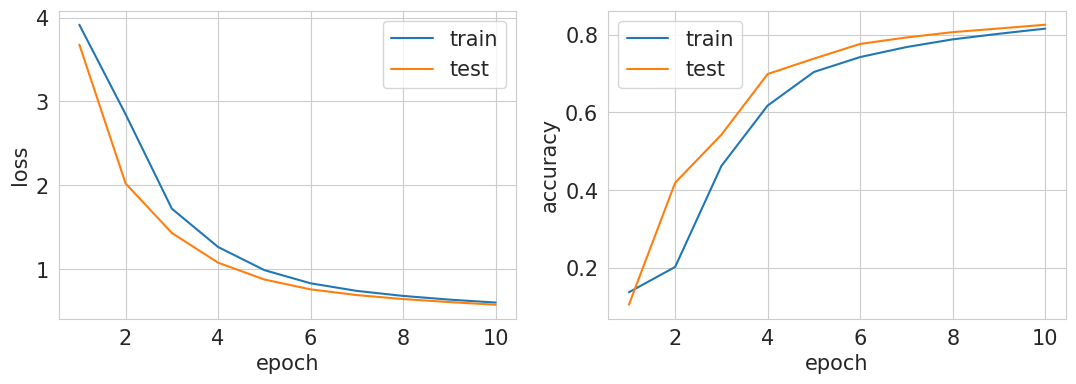

In [134]:
IMG_SIZE = 28
NUM_CLASSES = 10
HIDDEN_SIZE = 64
NUM_EPOCH = 10
LR = 0.01

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = NeuralNet(IMG_SIZE**2, HIDDEN_SIZE, NUM_CLASSES).to(device)

optimizer = torch.optim.SGD(model.parameters(), lr=LR, momentum=0)
# scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=NUM_EPOCHS)
criterion = nn.CrossEntropyLoss()

train(model, optimizer, criterion, train_loader, test_loader, NUM_EPOCH)

Добавим в обучение смену LR по расписанию.

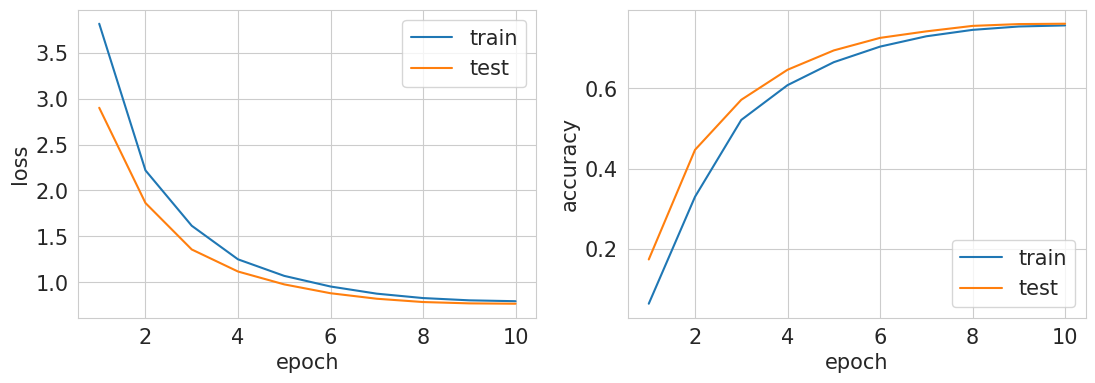

In [135]:
IMG_SIZE = 28
NUM_CLASSES = 10
HIDDEN_SIZE = 64
NUM_EPOCH = 10
LR = 0.01

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = NeuralNet(IMG_SIZE**2, HIDDEN_SIZE, NUM_CLASSES).to(device)

optimizer = torch.optim.SGD(model.parameters(), lr=LR, momentum=0)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=NUM_EPOCH)
criterion = nn.CrossEntropyLoss()

train(model, optimizer, criterion, train_loader, test_loader, NUM_EPOCH, scheduler=scheduler)

Теперь воспроизводимость и удобство нам обеспечены. Тем не менее, в этом коде всё ещё много чего не хватает.

Во-первых, логгировать эксперименты можно куда удобнее. Во-вторых, хорошо бы делать чекпойнты и сохранять лучшие версии модели по мере обучения, чтобы впоследствии их не потерять.

## 8. Логгирование экспериментов

Вместо того, чтобы каждый раз самим рисовать графики в `matplotlib`, можно красиво трекать метрики в полуавтоматическом режиме в [WandB.](https://docs.wandb.ai/)

**Зачем это надо:**

Обычно, при обучении моделей надо ставить большое количество экспериментов. Это делает команда из кучи людей. Очень удобно залоггировать всё в одно место и дальше сравнивать разные запуски моделей между собой. Для этого есть довольно много разных сервисов. На наш взгляд WandB один из самых удачных.

Для этого регистрируемся на сайте, устанавливаем и логинимся. Пробуем запустить [туториал со стартовой тетрадкой.](https://docs.wandb.ai/tutorials/pytorch/)

In [136]:
!pip install wandb -qU

In [145]:
import wandb
wandb.login()

Функции в переписанном варианте будут выглядеть вот так:

In [142]:
def training_epoch(model, optimizer, criterion, train_loader, tqdm_desc):
    train_loss, train_accuracy = 0.0, 0.0
    model.train()
    for images, labels in tqdm(train_loader, desc=tqdm_desc):
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        logits = model(torch.flatten(images, start_dim=1))
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * images.shape[0]
        train_accuracy += (logits.argmax(dim=1) == labels).sum().item()

        metrics = {
            "batch-train/loss": loss.item()
        }
        wandb.log(metrics)

    train_loss /= len(train_loader.dataset)
    train_accuracy /= len(train_loader.dataset)
    return train_loss, train_accuracy


@torch.no_grad()
def validation_epoch(model, criterion, test_loader, tqdm_desc):
    test_loss, test_accuracy = 0.0, 0.0
    model.eval()
    for images, labels in tqdm(test_loader, desc=tqdm_desc):
        images = images.to(device)
        labels = labels.to(device)

        logits = model(torch.flatten(images, start_dim=1))
        loss = criterion(logits, labels)

        test_loss += loss.item() * images.shape[0]
        test_accuracy += (logits.argmax(dim=1) == labels).sum().item()

    test_loss /= len(test_loader.dataset)
    test_accuracy /= len(test_loader.dataset)
    return test_loss, test_accuracy

def train(model, optimizer, criterion, train_loader, test_loader, num_epochs, scheduler=None):

    for epoch in range(1, num_epochs + 1):
        train_loss, train_accuracy = training_epoch(
            model, optimizer, criterion, train_loader,
            tqdm_desc=f'Training {epoch}/{num_epochs}'
        )
        val_loss, val_accuracy = validation_epoch(
            model, criterion, test_loader,
            tqdm_desc=f'Validating {epoch}/{num_epochs}'
        )

        if scheduler is not None:
            scheduler.step()

        metrics = {
            "train/loss": train_loss,
            "train/accuracy": train_accuracy,
            "val/loss": val_loss,
            "val/accuracy": val_accuracy
        }
        wandb.log(metrics)

In [143]:
IMG_SIZE = 28
NUM_CLASSES = 10
HIDDEN_SIZE = 64
NUM_EPOCH = 10
LR = 0.01

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = NeuralNet(IMG_SIZE**2, HIDDEN_SIZE, NUM_CLASSES).to(device)

optimizer = torch.optim.SGD(model.parameters(), lr=LR, momentum=0)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=NUM_EPOCH)
criterion = nn.CrossEntropyLoss()

In [144]:
wandb.init(
    project="my-first-nn-project",
    name='FCN + CosineAnnealingLR',
    config={
        "architecture": 'CNN',
        "learning_rate": LR,
        "scheduler": 'None',
        "epochs":  NUM_EPOCH,
        "dataset": "MNIST",
        "optimizer": 'SGD + CosineAnnealingLR',
    }
)

train(model, optimizer, criterion, train_loader, test_loader, NUM_EPOCH, scheduler=scheduler)

wandb.finish()

batch-train/loss,█████▆▆▄▃▃▂▂▂▂▂▂▁▁▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/accuracy,▁▂▃▅▆▇███
train/loss,█▇▅▃▂▂▁▁▁
val/accuracy,▁▂▃▆▇▇███
val/loss,█▇▃▂▂▁▁▁▁
batch-train/loss,1.00943
train/accuracy,1e-05
train/loss,2e-05
val/accuracy,0.6886
val/loss,0.97418


Training 1/10:   0%|          | 0/235 [00:00<?, ?it/s]

Validating 1/10:   0%|          | 0/3 [00:00<?, ?it/s]

Training 2/10:   0%|          | 0/235 [00:00<?, ?it/s]

Validating 2/10:   0%|          | 0/3 [00:00<?, ?it/s]

Training 3/10:   0%|          | 0/235 [00:00<?, ?it/s]

Validating 3/10:   0%|          | 0/3 [00:00<?, ?it/s]

Training 4/10:   0%|          | 0/235 [00:00<?, ?it/s]

Validating 4/10:   0%|          | 0/3 [00:00<?, ?it/s]

Training 5/10:   0%|          | 0/235 [00:00<?, ?it/s]

Validating 5/10:   0%|          | 0/3 [00:00<?, ?it/s]

Training 6/10:   0%|          | 0/235 [00:00<?, ?it/s]

Validating 6/10:   0%|          | 0/3 [00:00<?, ?it/s]

Training 7/10:   0%|          | 0/235 [00:00<?, ?it/s]

Validating 7/10:   0%|          | 0/3 [00:00<?, ?it/s]

Training 8/10:   0%|          | 0/235 [00:00<?, ?it/s]

KeyboardInterrupt: 